Predicting Fold-State of Proteins 
==========

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [162]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### What a protein looks like:

<img  src="85262_large.jpg"/>

In [163]:
seq = pd.read_csv('sequences.csv').drop('Unnamed: 0', axis=1).values.reshape((-1,))

### How the protein is encoded for us:

<img  src="AA_code.png" height=400 width=400/>

<img  src="protein_seq.jpg"/>

### What our actual data looks like:

In [15]:
print seq[:100]

['V' 'L' 'S' 'P' 'A' 'D' 'K' 'T' 'N' 'V' 'K' 'A' 'A' 'W' 'G' 'K' 'V' 'G'
 'A' 'H' 'A' 'G' 'E' 'Y' 'G' 'A' 'E' 'A' 'L' 'E' 'R' 'M' 'F' 'L' 'S' 'F'
 'P' 'T' 'T' 'K' 'T' 'Y' 'F' 'P' 'H' 'F' 'D' 'L' 'S' 'H' 'G' 'S' 'A' 'Q'
 'V' 'K' 'G' 'H' 'G' 'K' 'K' 'V' 'A' 'D' 'A' 'L' 'T' 'N' 'A' 'V' 'A' 'H'
 'V' 'D' 'D' 'M' 'P' 'N' 'A' 'L' 'S' 'A' 'L' 'S' 'D' 'L' 'H' 'A' 'H' 'K'
 'L' 'R' 'V' 'D' 'P' 'V' 'N' 'F' 'K' 'L']


### How this relates to Structure

<img  src="figure1.png"/>

<img  src="proteins-and-amino-acids-32-638.jpg"/>

### Fold States:

In [135]:
labels = pd.read_csv('5_formatted_labels.csv').drop('Unnamed: 0', axis=1).values.reshape((-1,))

In [137]:
fold_map = dict(zip(range(6), ["H", "E", "T", "S", "B", "U"]))

In [138]:
folds = np.asarray([fold_map[state] for state in labels])

In [139]:
print folds[:100]

['U' 'U' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'U' 'H'
 'H' 'H' 'H' 'H' 'H' 'U' 'T' 'T' 'S' 'U' 'U' 'S' 'T' 'T' 'U' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'T' 'T'
 'T' 'S' 'H' 'H' 'H' 'H' 'T' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'T' 'T'
 'U' 'U' 'U' 'T' 'H' 'H' 'H' 'H' 'H' 'H']


### Together

In [61]:
pd.DataFrame([folds[:100], seq[:100]], index=['Fold', 'AA'], columns=['']*100)

,,,,,,,,,,,...,,,,,,,,,,
Fold,U,U,H,H,H,H,H,H,H,H,...,U,U,U,T,H,H,H,H,H,H
AA,V,L,S,P,A,D,K,T,N,V,...,L,R,V,D,P,V,N,F,K,L


In [56]:
counts = Counter(folds)
percents = [v*1.0 / sum(counts.values()) for v in counts.values()]

perc = dict(zip(counts.keys(), percents))

### Imbalanced Classes

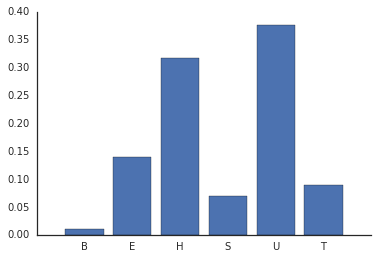

In [57]:
plt.bar(range(len(perc)), perc.values(), tick_label=perc.keys(), align='center')
sns.set_style('white')
sns.despine();

### Recall:

<img  src="cbow.png" height=400 width=400/>

### How our data is really formatted

In [63]:
skip_data = pd.read_csv('5_formatted_fixed.csv').drop('Unnamed: 0', axis=1)
skip_data.head()

,A-2,C-2,D-2,E-2,F-2,G-2,H-2,I-2,K-2,L-2,...,N2,P2,Q2,R2,S2,T2,V2,W2,Y2,-2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Take for an example:

In [65]:
print seq[:5]

['V' 'L' 'S' 'P' 'A']


In [68]:
['V-2', 'L-1', 'S0', 'P1', 'A2']

['V-2', 'L-1', 'S0', 'P1', 'A2']

In [108]:
ex0 = skip_data.ix[2]
pd.DataFrame([ex0.index, ex0.values], index=['AA', ''], columns=['']*105)

,,,,,,,,,,,...,,,,,,,,,,
AA,A-2,C-2,D-2,E-2,F-2,G-2,H-2,I-2,K-2,L-2,...,N2,P2,Q2,R2,S2,T2,V2,W2,Y2,-2
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### So just throwing a simple Feed Forward Neural Network at it:

In [110]:
import theano
from theano import tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams

from sklearn.cross_validation import train_test_split
from math import sqrt

In [152]:
data = pd.read_csv('5_formatted_fixed.csv').drop('Unnamed: 0', axis=1)
labels = pd.read_csv('5_formatted_fixed_labels.csv').drop('Unnamed: 0', axis=1)
print data.shape, labels.shape

(134815, 105) (134815, 6)


In [153]:
xTrain, xTest, yTrain, yTest = train_test_split(np.asarray(data), np.asarray(labels))
print xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

(101111, 105) (101111, 6) (33704, 105) (33704, 6)


In [159]:
def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

def init_weights(shape):
    (h, w) = shape
    normalizer = 2.0 * sqrt(6) / sqrt(h + w) * 0.1  #factors: correct for uni[0,1], glo, glo, softmax deriv
    return theano.shared(floatX((np.random.random_sample(shape) - 0.5) * normalizer))  #code for using Glorot init

def RMSprop(cost, params, lr=0.001, rho=0.9, epsilon=1e-6):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    for p, g in zip(params, grads):
        acc = theano.shared(p.get_value() * 0.)
        acc_new = rho * acc + (1 - rho) * g ** 2
        gradient_scaling = T.sqrt(acc_new + epsilon)
        g = g / gradient_scaling
        updates.append((acc, acc_new))
        updates.append((p, p - lr * g))
    return updates

def model(X, w_h, w_o):
    h = T.nnet.sigmoid(T.dot(X, w_h))
    pyx = T.nnet.softmax(T.dot(h, w_o))
    return pyx

X = T.fmatrix()
Y = T.fmatrix()

w_h = init_weights((105, 600))
w_o = init_weights((600, 6))

py_x = model(X, w_h, w_o)
y_pred = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
params = [w_h, w_o]

update = RMSprop(cost, params, lr=0.005)

train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

costs = []
train_scores = []
test_scores = []

for i in range(501):
    for start, end in zip(range(0, len(xTrain), 128), range(128, len(xTrain), 128)):
        cost = train(xTrain[start:end], yTrain[start:end])
    
    costs.append(cost)
    
    train_acc = np.mean(np.argmax(yTrain, axis=1) == predict(xTrain))
    
    test_acc = np.mean(np.argmax(yTest, axis=1) == predict(xTest))
    
    test_scores.append(test_acc)
    train_scores.append(train_acc)
    
    print i, train_acc, test_acc

0 0.460573033597 0.462467362924
1 0.478038986856 0.480239734156
2 0.485960973583 0.487835271778
3 0.498096151754 0.500029670069
4 0.545885215258 0.548480892476
5 0.556586325919 0.557826964159
6 0.559256658524 0.559963209115
7 0.565952270277 0.564947780679
8 0.572499530219 0.571564206029
9 0.577048985768 0.576430097318
10 0.581143495762 0.580079515784
11 0.583873169091 0.583372893425
12 0.586187457349 0.58631023024
13 0.590034714324 0.589336577261
14 0.594000652748 0.593193686209
15 0.598965493369 0.595359601234
16 0.602970992276 0.599187040114
17 0.605730335967 0.601798006171
18 0.608885284489 0.604408972229
19 0.610932539486 0.606604557323
20 0.614413861993 0.60820674104
21 0.617479799428 0.610194635652
22 0.619358922372 0.611055067648
23 0.621584199543 0.612597911227
24 0.623601784178 0.614200094944
25 0.62597541316 0.615179207216
26 0.627666623809 0.615772608592
27 0.629585307237 0.61737479231
28 0.631503990664 0.618175884168
29 0.6338083888 0.618976976027
30 0.636290809111 0.619362

KeyboardInterrupt: 

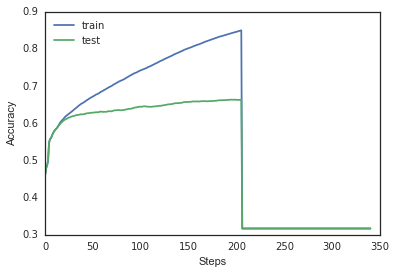

In [160]:
plt.plot(train_scores, label='train')
plt.plot(test_scores, label='test')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend(loc=2);

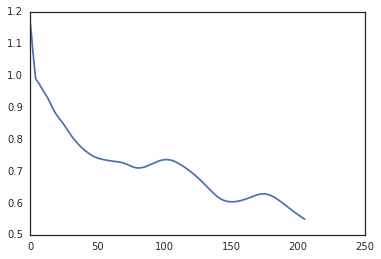

In [161]:
plt.plot(costs);

### So we're clearly having a problem, where Gradients are vanishing

## Adding convolution complexity

## Now add Recurrent

## Batch Normalization